### Load packages

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
from fractions import Fraction
sym.init_printing(use_unicode=True)

plt.rcParams.update({
    "figure.figsize": [12, 27/4],
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12,
    "legend.fontsize": 18,
    "axes.labelsize": 18,  
    "axes.labelcolor": "darkred",
})

# The Cobweb Model (8.3)
Model equations (given that $p_{t} \geq 0, \forall t$):
$$
    \begin{array}{lcl}
        q_{t}^{d} = a - bp_{t},\quad a,b > 0\\
        q_{t}^{s} = c + dp_{t-1},\quad d > 0\\
        q_{t}^{d} = q_{t}^{s} = q_{t}
    \end{array}
$$

Solution:
$$
    \begin{array}{lcl}
        a - bp_{t} = c - dp_{t-1}\\
        \color{red}{p_{t} = \left(\dfrac{a - c}{b}\right) - \left(\dfrac{d}{b}\right)p_{t-1}\quad (*)}
    \end{array}
$$
i.e. a first-order non-homogeneous difference equation.

## Equilibrium:
$$
    \begin{array}{lcl}
        p_{t} = p_{t-1} = p^{*} \Rightarrow \color{red}{p^{*} = \dfrac{a - c}{b + d}}
    \end{array}
$$

But $p_{t} \geq 0, \forall t \Rightarrow p^{*} \geq 0 \Rightarrow a \geq c$

To solve the difference equation, write it for the equilibrium point:
$$
    p^{*} = \left(\dfrac{a - c}{b}\right) - \left(\dfrac{d}{b}\right)p^{*}
$$

and then subtract it from $(*)$ to get
$$
    p_{t} - p^{*} = - \left(\dfrac{d}{b}\right)(p_{t-1} - p^{*})
$$

If the initial condition $p_{t} = p_{0}$ for $t = 0$ is given, then the solution is:
$$
    p_{t} - p^{*} = - \left(\dfrac{d}{b}\right)^{t}(p_{0} - p^{*})
$$

Using the result for $p^{*}$, the latter can also be written as
$$
    p_{t} = \dfrac{a - c}{b + d} - \left(\dfrac{d}{b}\right)^{t}\left(p_{0} - \dfrac{a - c}{b + d}\right)
$$

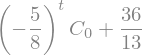

In [4]:
a = 20
b = 4
c = 2
d = Fraction(5,2)
p = sym.Function('p')
t = sym.symbols('t',integer=True)
f = p(t) + d/b*p(t-1) - Fraction(a - c, b)
eq_sol = sym.rsolve(f,p(t))
eq_sol

Assume $ p_{0} = 10 $

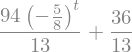

In [11]:
# With initial condition
eq_sol_final = sym.rsolve(f,p(t),{p(0):10})
eq_sol_final

The solution is stable, see also  the plot in the next slide.

<font color = "red"> Note, however, that the evolution towards the solution violates the condition that the price is non-negative. </font> (we'll see why, in brief: wrong assumption concerning $p_{0}$)

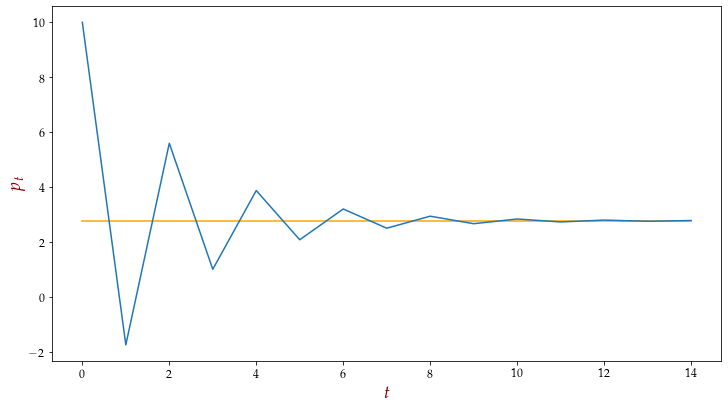

In [12]:
func = sym.lambdify(t, eq_sol_final,'numpy')
xvals = np.arange(0,15,1)
equil = [Fraction(a - c, b + d)] * 15
yvals = func(xvals)

# make figure
fig, ax = plt.subplots(1,1,subplot_kw=None)
ax.plot(xvals, equil, color = "orange")
ax.plot(xvals, yvals)
ax.set_xlabel('$t$')
ax.set_ylabel('$p_{t}$')
plt.subplots_adjust(bottom=0.15) # to avoid clipping of x-label
plt.show()
fig.savefig('demand_supply_sol.pdf')

<font color = "red">*What did we do wrong here?*</font><br>
* A price of 10 is impossible because it would violate the logic of the demand curve. 
* The vertical intercept of this curve equals 5, and that the price that corresponds to zero quantity demanded.
* You could now repeat all stuff using an initial price in the range $[0,5]$